<a href="https://colab.research.google.com/github/zunda-pixel/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.config.experimental import list_physical_devices, set_memory_growth
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
physical_devices = list_physical_devices('GPU')
if len(physical_devices) > 0:
    for k in range(len(physical_devices)):
        set_memory_growth(physical_devices[k], True)
else:
    print("Not enough GPU hardware devices available")

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

This image is  8


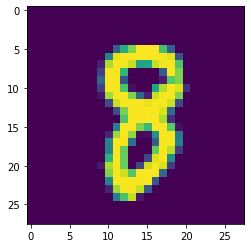

In [ ]:
number = random.randint(0, len(y_train))
print('This image is ', y_train[number])
plt.imshow(x_train[number])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test  = x_test.reshape(x_test.shape[0],   x_test.shape[1]  * x_test.shape[2])

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train /= 255
x_test  /= 255

num_classes = len(list(set(y_train)))

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
input_shape = x_train[0].shape

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
batch_size = 16
epochs = 10

In [ ]:
history  = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
3750/3750 [==============================] - 33s 9ms/step - loss: 0.3468 - accuracy: 0.8975 - val_loss: 0.1446 - val_accuracy: 0.9668
Epoch 2/10
3750/3750 [==============================] - 32s 8ms/step - loss: 0.1930 - accuracy: 0.9611 - val_loss: 0.1710 - val_accuracy: 0.9713
Epoch 3/10
3750/3750 [==============================] - 33s 9ms/step - loss: 0.1884 - accuracy: 0.9679 - val_loss: 0.1766 - val_accuracy: 0.9752
Epoch 4/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1936 - accuracy: 0.9686 - val_loss: 0.1690 - val_accuracy: 0.9757
Epoch 5/10
3750/3750 [==============================] - 32s 9ms/step - loss: 0.1826 - accuracy: 0.9714 - val_loss: 0.2070 - val_accuracy: 0.9750
Epoch 6/10
3750/3750 [==============================] - 32s 9ms/step - loss: 0.1905 - accuracy: 0.9725 - val_loss: 0.2374 - val_accuracy: 0.9772
Epoch 7/10
3750/3750 [==============================] - 32s 8ms/step - loss: 0.1981 - accuracy: 0.9729 - val_loss: 0.2176 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25146791338920593
Test accuracy: 0.9767000079154968
